In [51]:
import requests as req
import pandas as pd
import time


import sys
sys.path.append('../Python')
from  PyPower import *

In [52]:
url = 'https://azape.es/api/v1/orders/dates/:2023-01-01/:2023-10-31'

In [53]:
res = req.get(url)

In [54]:
res

<Response [200]>

In [55]:
res.json().keys()

dict_keys(['result', 'err'])

In [56]:
info = res.json()['result']

In [57]:
df = pd.DataFrame(info)

df.head()

,payment,status,statusCorrect,items,_id,gloriaId,client,address,restaurant,total_price,for_later,times,__v,surveySent,group,rider,partner,createdAt,updatedAt
0,ONLINE,Completed,True,"[{'id': 833756511, 'name': 'Sweet Home Alicant...",63b17acf88d774aa15c30b4e,623628039.0,"{'name': 'Inés Lázaro Gaspar', 'email': 'inesl...","{'street': 'Calle Hernán Cortés, 19 BAJO 2, Ed...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",34.6,True,"[{'by': 1672575695000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN
1,CASH,Completed,True,"[{'id': 833758718, 'name': 'Sweet Home Alicant...",63b17d4588d774aa15c30b55,623630325.0,"{'name': 'Natalia Gimeno', 'email': 'nataliagi...","{'street': 'Calle Pintor Antonio Amoros 4 , po...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",17.3,True,"[{'by': 1672576325000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN
2,CARD,Completed,True,"[{'id': 833764767, 'name': 'El honesto Mike', ...",63b185c188d774aa15c30b5c,623625424.0,"{'name': 'Yolanda Amador', 'email': 'Yamadorg@...","{'street': 'Calle maestro Alonso 97A', 'city':...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",50.3,True,"[{'by': 1672578496000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN
3,CASH,Completed,True,"[{'id': 833758679, 'name': 'DELIVERY_FEE', 'to...",63b1894588d774aa15c30b63,623629679.0,"{'name': 'roberto sanchez', 'email': 'arizafc@...","{'street': 'alonso cano 64 esc2 5b', 'city': ...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",37.5,False,"[{'by': 1672579397000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN
4,CARD,Completed,True,"[{'id': 833770213, 'name': 'Sweet Home Alicant...",63b18a4b88d774aa15c30b6a,623643891.0,"{'name': 'Miguel Perez campaña', 'email': 'mip...","{'street': 'Castor número 32', 'city': 'Alican...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",29.7,False,"[{'by': 1672579659000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN


In [58]:
df.shape

(2082, 19)

In [59]:
df[(df.createdAt.isna())].shape

(641, 19)

'N nan cols: 9'

gloriaId       2.689721
for_later      2.689721
__v           69.212296
surveySent    35.254563
group         78.242075
rider         78.242075
partner       91.162344
createdAt     30.787704
updatedAt     30.787704
dtype: float64

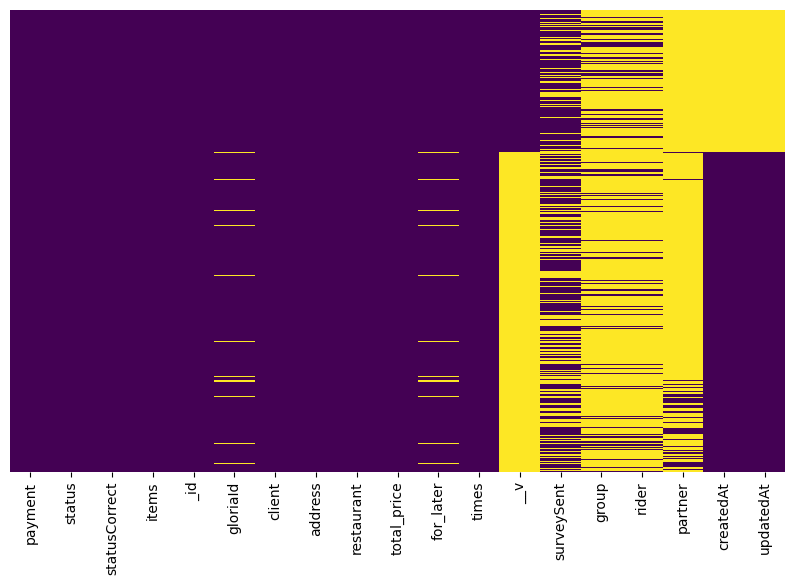

In [60]:
check_nan(df)

In [61]:
address = df['address'].copy()

In [62]:
address

0       {'street': 'Calle Hernán Cortés, 19 BAJO 2, Ed...
1       {'street': 'Calle Pintor Antonio Amoros 4 , po...
2       {'street': 'Calle maestro Alonso 97A', 'city':...
3       {'street': 'alonso cano 64 esc2  5b', 'city': ...
4       {'street': 'Castor número 32', 'city': 'Alican...
                              ...                        
2077    {'street': 'calle cabañal 5, escalera 6 6º M',...
2078    {'street': 'Calle Ronda del Castillo, N°8, 3°C...
2079    {'street': 'Vicente Alexandre 3', 'city': 'ALI...
2080    {'street': 'Alcalde José Luis lassaletta 17, e...
2081    {'street': 'Calle polop 6, 5°C', 'city': 'Alic...
Name: address, Length: 2082, dtype: object

In [63]:
direcciones = pd.json_normalize(address)

In [64]:
direcciones.head()

,street,city,zipcode,floor,latitude,longitude,more_address,intercom,apartment
0,"Calle Hernán Cortés, 19 BAJO 2, Edificio",San Vicente del Raspeig,03690,"Calle Hernán Cortés, 19 BAJO 2",0,0,NaN,NaN,NaN
1,"Calle Pintor Antonio Amoros 4 , portal 2 esc i...",Alicante,03015,4d,38.370743482023485,-0.4713171153123774,NaN,NaN,NaN
2,Calle maestro Alonso 97A,Alicante,03010,Urgencias ginecologia hospital general(la cuesta),0,0,NaN,NaN,NaN
3,alonso cano 64 esc2 5b,alicante,03015,esc2 5b,0,0,NaN,NaN,NaN
4,Castor número 32,Alicante,03007,Bloque 2 entresuelo (bajo) 1,0,0,NaN,NaN,NaN


In [65]:
direcciones[(direcciones.zipcode.isna())].shape

(12, 9)

'N nan cols: 7'

zipcode          0.576369
floor           45.148895
latitude         2.689721
longitude        2.689721
more_address    97.790586
intercom        99.951969
apartment       99.951969
dtype: float64

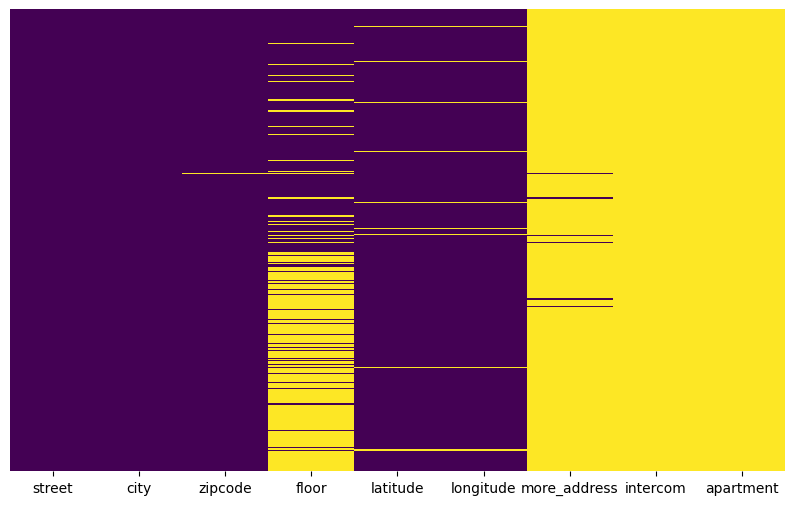

In [66]:
check_nan(direcciones)

In [67]:
direcciones = drop_columns(direcciones, ['more_address', 'intercom', 'apartment', 'floor'])

'N nan cols: 3'

zipcode      0.576369
latitude     2.689721
longitude    2.689721
dtype: float64

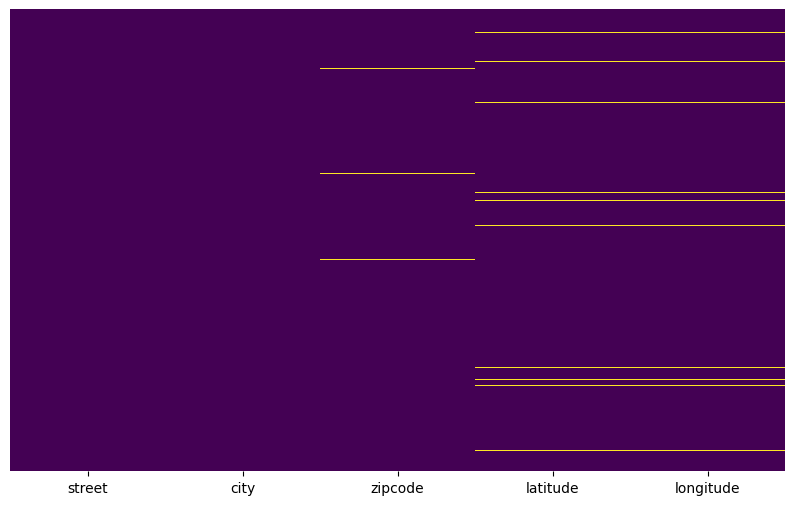

In [68]:
check_nan(direcciones)

In [69]:
direcciones.shape

(2082, 5)

In [70]:
direcciones.city.value_counts()

city
Alicante                                     1750
ALICANTE                                       75
Alicante (Alacant)                             61
alicante                                       39
San Vicente del Raspeig                        32
Alacant                                        24
San vicente del raspeig                         9
Alicante/Alacant                                6
03005                                           5
San Vicente del raspeig                         5
ALICANTE/ALACANT                                4
San Vicente                                     4
San Juan de Alicante                            4
san vicente del raspeig                         3
Villafranqueza, Alicante                        3
San Vicente Del Raspeig                         3
san vicente                                     3
Sant Joan d'Alacant, Alicante                   2
Sant Joan dalacant                              2
Alicamte, San Blas                           

In [71]:
times = df['times'].copy()

In [72]:
times[0]
lista_nums =[]
for lista in times:
    a = lista[0]['by']
    lista_nums.append(a)
len(lista_nums)

2082

In [73]:
df['timestamp'] = lista_nums

In [74]:
df['fecha'] = pd.to_datetime(df['timestamp'], unit='ms').dt.strftime('%Y-%m-%d %H:%M')

In [75]:
df.fecha = pd.to_datetime(df.fecha)

In [76]:
df.head()

,payment,status,statusCorrect,items,_id,gloriaId,client,address,restaurant,total_price,...,times,__v,surveySent,group,rider,partner,createdAt,updatedAt,timestamp,fecha
0,ONLINE,Completed,True,"[{'id': 833756511, 'name': 'Sweet Home Alicant...",63b17acf88d774aa15c30b4e,623628039.0,"{'name': 'Inés Lázaro Gaspar', 'email': 'inesl...","{'street': 'Calle Hernán Cortés, 19 BAJO 2, Ed...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",34.6,...,"[{'by': 1672575695000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN,1672575695000,2023-01-01 12:21:00
1,CASH,Completed,True,"[{'id': 833758718, 'name': 'Sweet Home Alicant...",63b17d4588d774aa15c30b55,623630325.0,"{'name': 'Natalia Gimeno', 'email': 'nataliagi...","{'street': 'Calle Pintor Antonio Amoros 4 , po...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",17.3,...,"[{'by': 1672576325000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN,1672576325000,2023-01-01 12:32:00
2,CARD,Completed,True,"[{'id': 833764767, 'name': 'El honesto Mike', ...",63b185c188d774aa15c30b5c,623625424.0,"{'name': 'Yolanda Amador', 'email': 'Yamadorg@...","{'street': 'Calle maestro Alonso 97A', 'city':...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",50.3,...,"[{'by': 1672578496000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN,1672578496000,2023-01-01 13:08:00
3,CASH,Completed,True,"[{'id': 833758679, 'name': 'DELIVERY_FEE', 'to...",63b1894588d774aa15c30b63,623629679.0,"{'name': 'roberto sanchez', 'email': 'arizafc@...","{'street': 'alonso cano 64 esc2 5b', 'city': ...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",37.5,...,"[{'by': 1672579397000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN,1672579397000,2023-01-01 13:23:00
4,CARD,Completed,True,"[{'id': 833770213, 'name': 'Sweet Home Alicant...",63b18a4b88d774aa15c30b6a,623643891.0,"{'name': 'Miguel Perez campaña', 'email': 'mip...","{'street': 'Castor número 32', 'city': 'Alican...","{'_id': '640f9b4f91db3c46413352df', 'internalN...",29.7,...,"[{'by': 1672579659000, 'action': 'accepted_at'...",1.0,True,NaN,NaN,NaN,NaN,NaN,1672579659000,2023-01-01 13:27:00


In [77]:
df.fecha.value_counts()

fecha
2023-05-22 19:34:00    2
2023-03-16 19:41:00    2
2023-03-31 19:32:00    2
2023-08-24 20:06:00    2
2023-02-08 19:48:00    2
                      ..
2023-03-27 18:31:00    1
2023-03-27 12:12:00    1
2023-03-27 11:39:00    1
2023-03-26 20:47:00    1
2023-10-29 20:09:00    1
Name: count, Length: 2022, dtype: int64

In [78]:
mapa = direcciones.copy()

In [81]:
mapa.drop(columns=['street','city', 'zipcode'], inplace=True)

In [82]:
mapa['timestamp'] = df.timestamp

In [84]:
mapa = mapa[(mapa.latitude != 0)]

In [85]:
mapa

,latitude,longitude,timestamp
1,38.370743482023485,-0.4713171153123774,1672576325000
5,38.341867211037425,-0.5048550226219284,1672580248000
7,38.34405130925046,-0.5069880775612319,1672581256000
9,38.37088349810811,-0.4566581145863968,1672599203000
10,38.371705925039144,-0.4746596109493284,1672604617000
...,...,...,...
2074,38.36595340269283,-0.4925815118548349,1698521948000
2078,38.35023694358526,-0.4897710686748358,1698586632000
2079,38.36461068463275,-0.4900599209627843,1698599761000
2080,38.33553400423126,-0.5054417022555624,1698607199000


In [86]:
mapa.to_csv('../../data/mapa.csv')